# SGDRegressor

<img src = "https://assets.website-files.com/5e6f9b297ef3941db2593ba1/5f3a45407c8f9dca9fbfed2c_1_OfYVPAl2ZEBeBHlTfq_glA.png">

SGD Regressor is a type of regression algorithm that uses Stochastic Gradient Descent (SGD) optimization to find the coefficients that minimize the mean squared error loss function.

The basic idea behind SGD is to update the model's parameters (coefficients) in small batches, rather than using the entire dataset at once. This makes it faster and more efficient than batch gradient descent, especially for large datasets.

In SGD Regressor, the algorithm starts with random coefficients and then updates them iteratively, taking small steps in the direction of the negative gradient of the loss function. This process continues until the algorithm reaches a minimum point or a stopping criterion is met.

One important hyperparameter in SGD Regressor is the learning rate, which determines the size of the steps taken during each iteration. If the learning rate is too high, the algorithm may overshoot the minimum point and fail to converge, while if it is too low, the algorithm may take too many iterations to converge.

SGD Regressor is commonly used in machine learning applications such as linear regression, support vector regression, and logistic regression. It is also popular for online learning, where the model is updated continuously as new data becomes available.



In [ ]:
import numpy as np 
import seaborn as sns

Lets assume we have two arrays `features` and `target`.

In [ ]:
features = np.array([x for x in range(100)])

In [ ]:
features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
target = np.array([x for x in range(0 , 200  ,2)])

In [ ]:
target

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198])

And we want to predict the target values on the basis of `feature` values. or sort of find a relationship ammong the two arrays. According to Linear Regression. We can do this by $y = mx + b$ or $\hat y = \beta_0 + \beta_1x$. As we have only one feature, so we are only considering $2$ values here.

These $b$ or $\beta_0$ is the baises and the other $\beta$  are the weight values. And we will caluclate these only 

First we will intialize these weights as random values. and then calculate the loss between them

In [ ]:
weights = abs(np.random.randn(1))
biases = abs(np.random.randn(1))

In [ ]:
weights

array([0.03696912])

In [ ]:
biases

array([0.34226874])

Lets assume we want to predict the corresponding value of $30$ in the target.

In [ ]:
x = 30

In [ ]:
pred = weights * 30 + biases

In [ ]:
pred

array([1.45134232])

We know it will be $60$ and the predicted value is $18$. So there will be some loss in this value. We will try to minimize that loss

In [ ]:
l = (pred - 60) ** 2

In [ ]:
l

array([3427.94531619])

At first loss is very high. We will try to find some sort of relationship in this loss and our parameters

In [ ]:
weights += 0.001 * l

In [ ]:
biases += 0.001 * l

In [ ]:
pred = weights * 30 + biases

In [ ]:
l = (pred - 60) ** 2

In [ ]:
l

array([2276.97384679])

And now our loss is drasitcally reduced 

If we do this iteratively, there is a high chance that we will reach $0$ loss

In [ ]:
for _ in range(100):
    pred = weights * 30 + biases
    loss = (pred - 60) ** 2
    weights += 0.001 * loss
    biases += 0.001 * loss

<ipython-input-269-9e7a19ca1369>:3: RuntimeWarning: overflow encountered in square
  loss = (pred - 60) ** 2


In [ ]:
weights

array([inf])

In [ ]:
biases

array([inf])

Lets intialize the weights and biases again and plot some graphs

In [ ]:
weights = abs(np.random.randn(1))
biases = abs(np.random.randn(1))

predic = []
losses = []
for _ in range(100):
    pred = weights * 30 + biases
    predic.append(pred)
    loss = (pred - 60) ** 2
    losses.append(loss)
    weights += 0.001 * loss
    biases += 0.001 * loss

<Axes: >

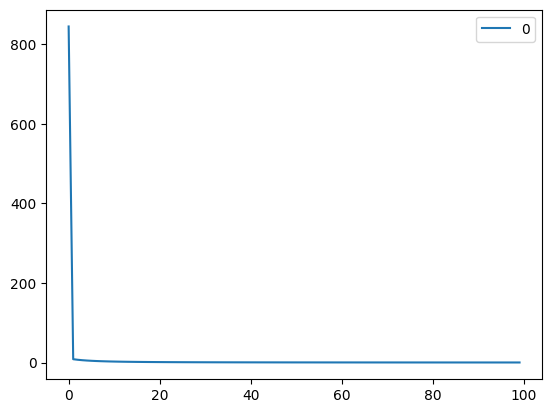

In [ ]:
sns.lineplot(np.array(losses))

<Axes: >

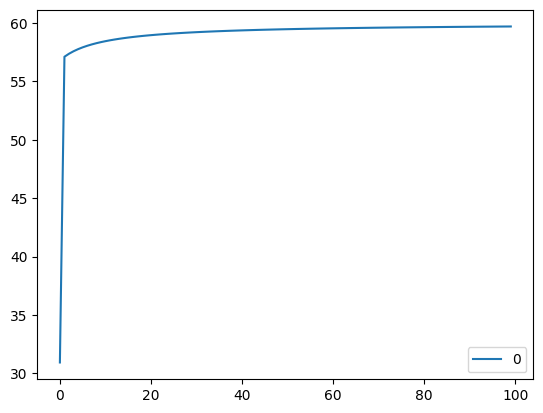

In [ ]:
sns.lineplot(np.array(predic))

And after $100$ iterations, we have reached a satisfacotry value. Though it is not perfect, but it is close.

We did this with one value, lets try to take all of the values and predict them 

In [ ]:
weights = abs(np.random.randn(1))
biases = abs(np.random.randn(1))
print(weights , biases)
predic = []
losses = []
for _ in range(300):
    pred = weights * features + biases
    predic.append(pred)
    loss = np.sum((pred - target) ** 2)
    losses.append(loss)
    weights += 0.000001 * loss
    biases += 0.000001 * loss

[1.16004287] [0.50777964]


Now lets just plot all of this into a function 

In [ ]:
def SGDRegressor():
    weights = abs(np.random.randn(1))
    biases = abs(np.random.randn(1))
    predic = []
    losses = []
    for _ in range(300):
        pred = weights * features + biases
        predic.append(pred)
        loss = np.sum((pred - target) ** 2)
        losses.append(loss)
        weights += 0.000001 * loss
        biases += 0.000001 * loss

    return weights , biases